In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
#!pip install imblearn
#!pip install tabulate

In [2]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\Internsavy\\Admission_Predict.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
data.duplicated().sum()

0

In [8]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
cols_to_scale=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

In [11]:
scaler=StandardScaler()
data[cols_to_scale]=scaler.fit_transform(data[cols_to_scale])

In [12]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112,0.92
1,2,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112,0.76
2,3,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112,0.72
3,4,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112,0.80
4,5,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975,0.65
...,...,...,...,...,...,...,...,...,...
395,396,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.909112,0.82
396,397,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.909112,0.84
397,398,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,0.909112,0.91
398,399,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-1.099975,0.67


In [13]:
for i in range(len(data)):
    if data['Chance of Admit '].iloc[i] > 0.8:
        data['Chance of Admit '].iloc[i] = 1
    else:
        data['Chance of Admit '].iloc[i] = 0


C:\Users\ushak\programming\New folder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112,1.0
1,2,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112,0.0
2,3,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112,0.0
3,4,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112,0.0
4,5,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975,0.0
...,...,...,...,...,...,...,...,...,...
395,396,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.909112,1.0
396,397,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.909112,1.0
397,398,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,0.909112,1.0
398,399,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-1.099975,0.0


In [15]:
data['Chance of Admit '].nunique()

2

In [16]:
data['Chance of Admit '].value_counts()


0.0    283
1.0    117
Name: Chance of Admit , dtype: int64

C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


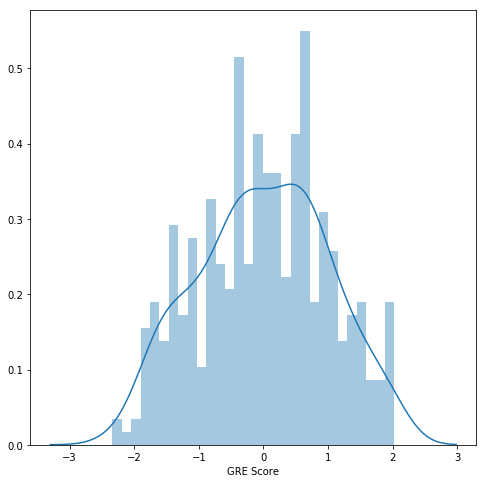

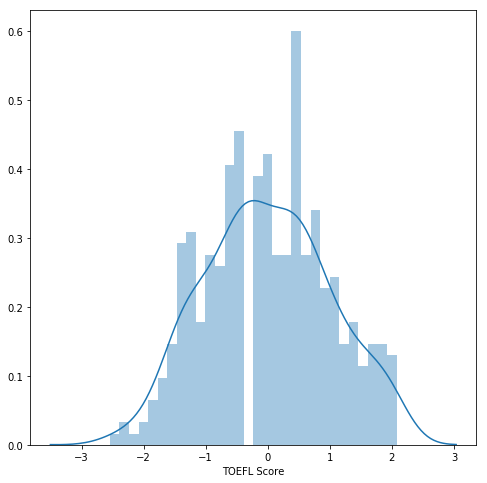

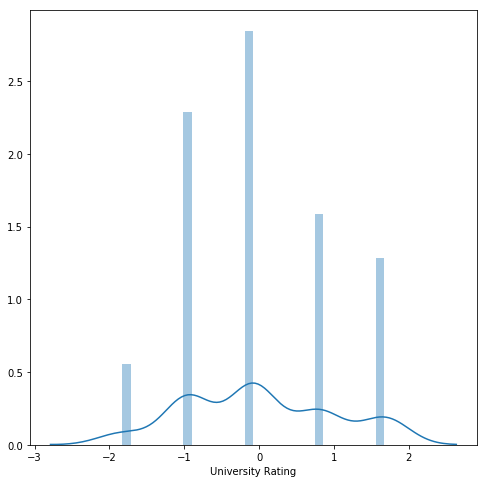

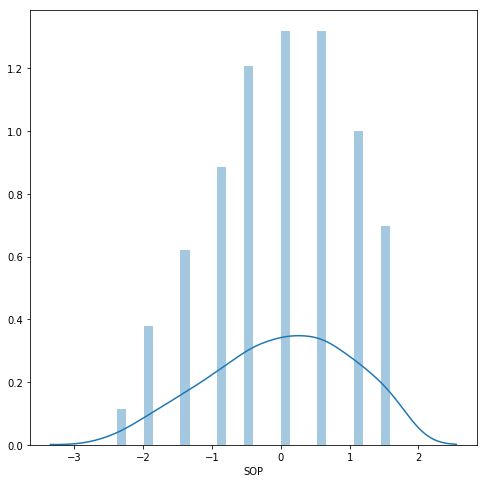

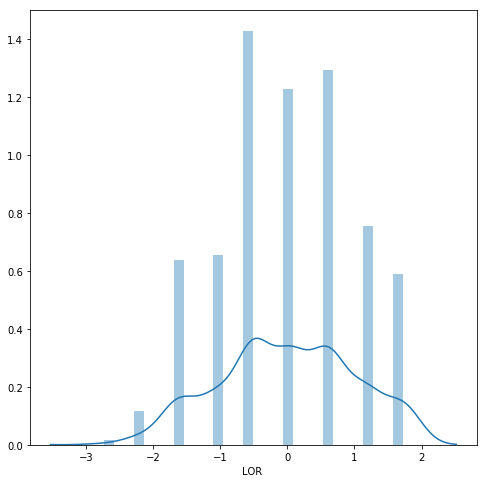

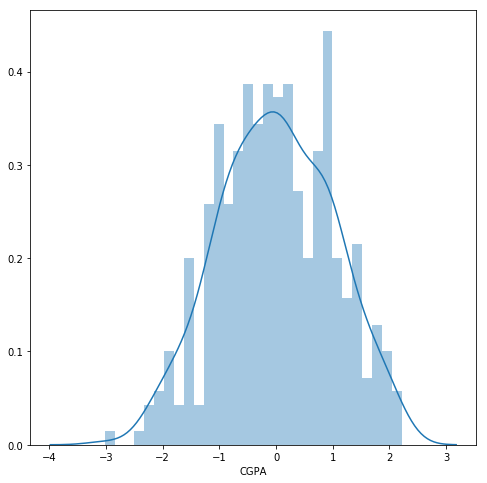

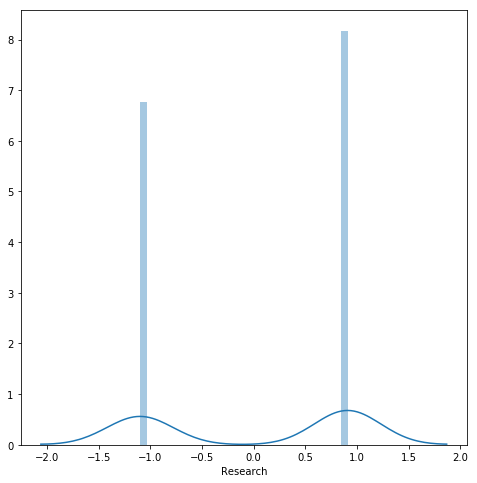

In [17]:
for col in cols_to_scale:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

In [18]:
x=data[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]

In [19]:
x.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [20]:
y=data['Chance of Admit ']

In [21]:
y.head(5)

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Chance of Admit , dtype: float64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [23]:
X_train.shape

(320, 7)

In [24]:
y_train.shape

(320,)

In [25]:
X_test.shape

(80, 7)

In [26]:
y_test.shape

(80,)

# DTC

In [27]:
clf=DecisionTreeClassifier()

In [28]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
test_pred=clf.predict(X_test)

In [30]:
test_pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
test_pred=pd.DataFrame(test_pred)

In [32]:
test_pred.head(5)

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [33]:
test_pred = test_pred.rename(columns={0:'predicted_y'})

In [34]:
test_pred

,predicted_y
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
75,0.0
76,0.0
77,0.0
78,0.0


In [35]:
test_pred=test_pred.reset_index(drop=True)

In [36]:
y_test=pd.DataFrame(y_test)

In [37]:
y_test

,Chance of Admit
255,0.0
346,0.0
228,0.0
384,1.0
269,0.0
...,...
320,0.0
73,1.0
79,0.0
390,0.0


In [38]:
y_test=y_test.reset_index(drop=True)

In [39]:
result = y_test.merge(test_pred, left_index=True, right_index=True)



In [40]:
result

,Chance of Admit,predicted_y
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
75,0.0,0.0
76,1.0,0.0
77,0.0,0.0
78,0.0,0.0


In [41]:
cm = confusion_matrix(y_test, test_pred)

In [42]:
cm

array([[59,  2],
       [ 4, 15]], dtype=int64)

In [43]:
report = classification_report(y_test, test_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[59  2]
 [ 4 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        61
         1.0       0.88      0.79      0.83        19

    accuracy                           0.93        80
   macro avg       0.91      0.88      0.89        80
weighted avg       0.92      0.93      0.92        80



# SVC

In [44]:
svm_classifier = SVC()

In [45]:
svm_classifier.fit(X_train, y_train)

SVC()

In [46]:
y_pred = svm_classifier.predict(X_test)

In [47]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[60  1]
 [ 3 16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        61
         1.0       0.94      0.84      0.89        19

    accuracy                           0.95        80
   macro avg       0.95      0.91      0.93        80
weighted avg       0.95      0.95      0.95        80



# SMOTE DTC

In [49]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [50]:
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
0.0    222
1.0     98
Name: Chance of Admit , dtype: int64
Class distribution after SMOTE:
1.0    222
0.0    222
Name: Chance of Admit , dtype: int64


In [51]:
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [52]:
test_pred=clf.predict(X_test)

In [53]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[56  5]
 [ 4 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93        61
         1.0       0.75      0.79      0.77        19

    accuracy                           0.89        80
   macro avg       0.84      0.85      0.85        80
weighted avg       0.89      0.89      0.89        80



# SMOTE SVC

In [54]:
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)



SVC()

In [55]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

Confusion Matrix:
[[56  5]
 [ 4 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93        61
         1.0       0.75      0.79      0.77        19

    accuracy                           0.89        80
   macro avg       0.84      0.85      0.85        80
weighted avg       0.89      0.89      0.89        80



# LOGISTIC REGRESSION

In [56]:
log_reg=LogisticRegression()

In [57]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [58]:
test_pred=log_reg.predict(X_test)

In [59]:
test_pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [60]:
cm=confusion_matrix(y_test,test_pred)

In [61]:
cm

array([[58,  3],
       [ 2, 17]], dtype=int64)

In [62]:
print("\nClassification Report:")
print(classification_report(y_test, test_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        61
         1.0       0.85      0.89      0.87        19

    accuracy                           0.94        80
   macro avg       0.91      0.92      0.92        80
weighted avg       0.94      0.94      0.94        80



# SMOTE LOGISTIC REGRESSION

In [63]:
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [64]:
test_pred=log_reg.predict(X_test)

In [65]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[57,  4],
       [ 2, 17]], dtype=int64)

In [66]:
print("\nClassification Report:")
print(classification_report(y_test, test_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        61
         1.0       0.81      0.89      0.85        19

    accuracy                           0.93        80
   macro avg       0.89      0.91      0.90        80
weighted avg       0.93      0.93      0.93        80



# XGBoost

In [67]:
xgb_model = xgb.XGBClassifier()

In [68]:
xgb_model.fit(X_train, y_train)

[21:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ushak\programming\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
y_pred = xgb_model.predict(X_test)

In [70]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[59  2]
 [ 4 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        61
         1.0       0.88      0.79      0.83        19

    accuracy                           0.93        80
   macro avg       0.91      0.88      0.89        80
weighted avg       0.92      0.93      0.92        80



# SMOTE XGBoost

In [71]:
xgb_model.fit(X_train_resampled, y_train_resampled)

[21:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ushak\programming\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
y_pred = xgb_model.predict(X_test)

In [73]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[60  1]
 [ 4 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        61
         1.0       0.94      0.79      0.86        19

    accuracy                           0.94        80
   macro avg       0.94      0.89      0.91        80
weighted avg       0.94      0.94      0.94        80



# KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=3)

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred = knn.predict(X_test)

In [77]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[58  3]
 [ 3 16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        61
         1.0       0.84      0.84      0.84        19

    accuracy                           0.93        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.93      0.93      0.93        80



# Smote KNN 

In [78]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_pred = knn.predict(X_test)

In [80]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[54  7]
 [ 3 16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92        61
         1.0       0.70      0.84      0.76        19

    accuracy                           0.88        80
   macro avg       0.82      0.86      0.84        80
weighted avg       0.89      0.88      0.88        80



# COMPARING EACH MODEL

In [81]:
# Create a list of algorithms
algorithms = ["DTC","SVC","SMOTE DTC","SMOTE SVC","LR","SMOTE LR","XGBoost","SMOTE XGB","KNN","SMOTE KNN"]

# Create a list of evaluation metric values
precision_0 = [0.94,0.95,0.92,0.92,0.97,0.97,0.94,0.94,0.95,0.95]
precision_1 = [0.88,0.94,0.74,0.74,0.85,0.81,0.88,0.94,0.84,0.70]
recall_0 = [0.97,0.98,0.92,0.92,0.95,0.93,0.97,0.98,0.95,0.89]
recall_1 = [0.79,0.84,0.74,0.74,0.89,0.89,0.79,0.79,0.84,0.84]
f1_score_0 = [0.95,0.97,0.92,0.92,0.96,0.95,0.95,0.96,0.95,0.92]
f1_score_1 = [0.83,0.89,0.74,0.74,0.87,0.85,0.83,0.86,0.84,0.76]

# Create a list of lists for the table data
table_data = list(zip(algorithms,precision_0,precision_1,recall_0,recall_1,f1_score_0, f1_score_1 ))

# Define the table headers
headers = ["algorithms","precision_0","precision_1","recall_0","recall_1","f1_score_0", "f1_score_1"]

# Generate the table using tabulate
table = tabulate(table_data, headers, tablefmt="grid")

# Print the table
print(table)

+--------------+---------------+---------------+------------+------------+--------------+--------------+
| algorithms   |   precision_0 |   precision_1 |   recall_0 |   recall_1 |   f1_score_0 |   f1_score_1 |
+==============+===============+===============+============+============+==============+==============+
| DTC          |          0.94 |          0.88 |       0.97 |       0.79 |         0.95 |         0.83 |
+--------------+---------------+---------------+------------+------------+--------------+--------------+
| SVC          |          0.95 |          0.94 |       0.98 |       0.84 |         0.97 |         0.89 |
+--------------+---------------+---------------+------------+------------+--------------+--------------+
| SMOTE DTC    |          0.92 |          0.74 |       0.92 |       0.74 |         0.92 |         0.74 |
+--------------+---------------+---------------+------------+------------+--------------+--------------+
| SMOTE SVC    |          0.92 |          0.74 |       

In [82]:
# Create a list of algorithms
algorithms = ["DTC","SVC","SMOTE DTC","SMOTE SVC","LR","SMOTE LR","XGBoost","SMOTE XGB","KNN","SMOTE KNN"]

# Create a list of evaluation metric values
accuracy = [0.93,0.95,0.88,0.88,0.94,0.93,0.93,0.94,0.93,0.88]

# Create a list of lists for the table data
table_data = list(zip(algorithms,accuracy))

# Define the table headers
headers = ["algorithms","accuracy"]

# Generate the table using tabulate
table = tabulate(table_data, headers, tablefmt="grid")

# Print the table
print(table)

+--------------+------------+
| algorithms   |   accuracy |
+==============+============+
| DTC          |       0.93 |
+--------------+------------+
| SVC          |       0.95 |
+--------------+------------+
| SMOTE DTC    |       0.88 |
+--------------+------------+
| SMOTE SVC    |       0.88 |
+--------------+------------+
| LR           |       0.94 |
+--------------+------------+
| SMOTE LR     |       0.93 |
+--------------+------------+
| XGBoost      |       0.93 |
+--------------+------------+
| SMOTE XGB    |       0.94 |
+--------------+------------+
| KNN          |       0.93 |
+--------------+------------+
| SMOTE KNN    |       0.88 |
+--------------+------------+


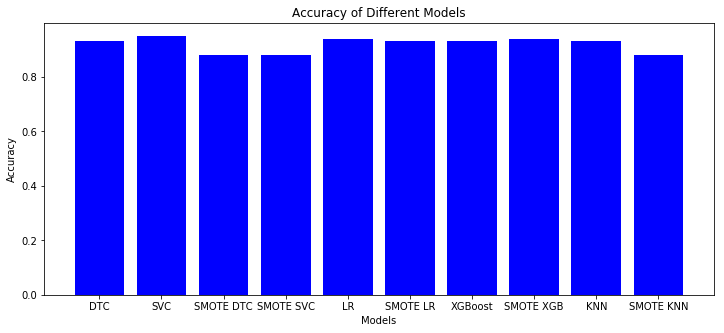

In [83]:
# Create a list of models
models = ["DTC","SVC","SMOTE DTC","SMOTE SVC","LR","SMOTE LR","XGBoost","SMOTE XGB","KNN","SMOTE KNN"]

# Create a list of accuracy values
accuracy = [0.93,0.95,0.88,0.88,0.94,0.93,0.93,0.94,0.93,0.88]

# Set the figure size
plt.figure(figsize=(12,5))

# Create the bar plot
plt.bar(models, accuracy, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display the plot
plt.show()


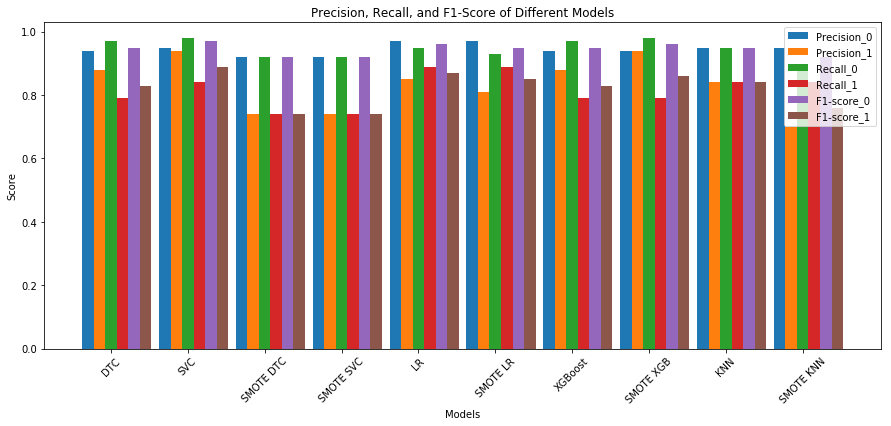

In [84]:
# Create a list of models
models = ["DTC", "SVC", "SMOTE DTC", "SMOTE SVC", "LR", "SMOTE LR", "XGBoost", "SMOTE XGB", "KNN", "SMOTE KNN"]

# Create a list of precision, recall, and F1-score values
precision_0 = [0.94,0.95,0.92,0.92,0.97,0.97,0.94,0.94,0.95,0.95]
precision_1 = [0.88,0.94,0.74,0.74,0.85,0.81,0.88,0.94,0.84,0.70]
recall_0 = [0.97,0.98,0.92,0.92,0.95,0.93,0.97,0.98,0.95,0.89]
recall_1 = [0.79,0.84,0.74,0.74,0.89,0.89,0.79,0.79,0.84,0.84]
f1_score_0 = [0.95,0.97,0.92,0.92,0.96,0.95,0.95,0.96,0.95,0.92]
f1_score_1 = [0.83,0.89,0.74,0.74,0.87,0.85,0.83,0.86,0.84,0.76]


# Set the figure size
plt.figure(figsize=(15, 6))

# Set the bar width
bar_width = 0.15

# Set the index positions of the bars
index = np.arange(len(models))

# Plot the precision, recall, and F1-score
plt.bar(index, precision_0, bar_width, label='Precision_0')
plt.bar(index + bar_width, precision_1, bar_width, label='Precision_1')
plt.bar(index + 2 * bar_width, recall_0, bar_width, label='Recall_0')
plt.bar(index + 3 * bar_width, recall_1, bar_width, label='Recall_1')
plt.bar(index + 4 * bar_width, f1_score_0, bar_width, label='F1-score_0')
plt.bar(index + 5 * bar_width, f1_score_1, bar_width, label='F1-score_1')

# Add x-axis labels and tick positions
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score of Different Models')
plt.xticks(index + 2 * bar_width, models, rotation=45)
plt.legend()

# Display the plot
plt.show()
